[[10.49671415  9.8617357 ]
 [10.64768854 11.52302986]
 [ 9.76584663  9.76586304]
 ...
 [ 9.63467845 10.18468031]
 [ 8.65287371  9.02838596]
 [11.20041391  9.34310572]]


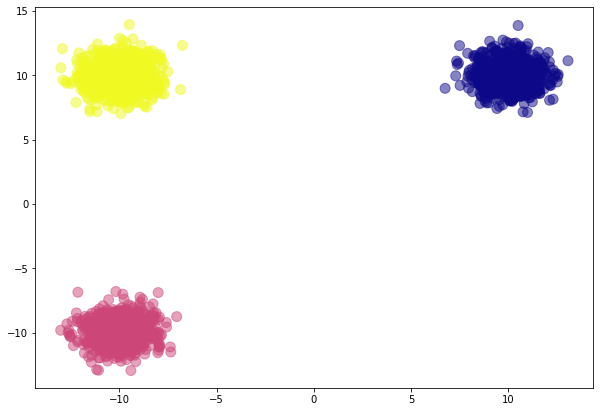

Loss function value:  4130.161362192804
Loss function value:  13.537488891667707
Loss function value:  6.715162484762519
Loss function value:  4.463880281038014
Loss function value:  3.342898165614705
Loss function value:  2.6718665006560514
Loss function value:  2.225179211672246
Loss function value:  1.9064498461610113
Loss function value:  1.66758737439284
Loss function value:  1.4819158769474474
Loss function value:  1.3334487328670455
Loss function value:  1.2120221608328967
Loss function value:  1.1108654587858227
Loss function value:  1.0252941727984322
Loss function value:  0.9519640427751129
Loss function value:  0.8884237254579938
Loss function value:  0.832835435652804
Loss function value:  0.7837942903881817
Loss function value:  0.7402079331595313
Loss function value:  0.7012142085910241
Loss function value:  0.6661235576925446
Loss function value:  0.634377886288804
Loss function value:  0.6055206607439358
Loss function value:  0.5791748112114999
Loss function value:  0.5

Loss function value:  0.06691618930273213
Loss function value:  0.06658164261137778
Loss function value:  0.06625042471769099
Loss function value:  0.06592248618263331
Loss function value:  0.06559777854138056
Loss function value:  0.0652762542794549
Loss function value:  0.06495786680952823
Loss function value:  0.0646425704489253
Loss function value:  0.06433032039775097
Loss function value:  0.06402107271772751
Loss function value:  0.06371478431149621
Loss function value:  0.06341141290265877
Loss function value:  0.06311091701630839
Loss function value:  0.06281325596009148
Loss function value:  0.0625183898058897
Loss function value:  0.06222627937192043
Loss function value:  0.061936886205399805
Loss function value:  0.06165017256567228
Loss function value:  0.061366101407777304
Loss function value:  0.061084636366519444
Loss function value:  0.060805741740920474
Loss function value:  0.060529382479141323
Loss function value:  0.060255524163797314
Loss function value:  0.0599841

In [10]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

#Class 1
mean = [10,10]
cov = [[1,0],
       [0,1]] 
Class1 = np.random.multivariate_normal(mean,cov,700)

print(Class1)

mean = [-10,-10]
cov = [[1,0],
       [0,1]] 
Class2 = np.random.multivariate_normal(mean,cov,700)

mean = [-10,10]
cov = [[1,0],
       [0,1]] 
Class3 = np.random.multivariate_normal(mean,cov,700)


feature_set = np.vstack([Class1, Class2, Class3])

labels = np.array([0]*700 + [1]*700 + [2]*700)

one_hot_labels = np.zeros((2100, 3))

for i in range(2100):
    one_hot_labels[i, labels[i]] = 1

plt.figure(figsize=(10,7))
plt.scatter(feature_set[:,0], feature_set[:,1], c=labels, cmap='plasma', s=100, alpha=0.5)
plt.show()

def sigmoid(x):
    return 1/(1+np.exp(-x))

def sigmoid_der(x):
    return sigmoid(x) *(1-sigmoid (x))

def softmax(A):
    expA = np.exp(A)
    return expA / expA.sum(axis=1, keepdims=True)

instances = feature_set.shape[0]
attributes = feature_set.shape[1]
hidden_nodes = 4
output_labels = 3

wh = np.random.rand(attributes,hidden_nodes)
bh = np.random.randn(hidden_nodes)

wo = np.random.rand(hidden_nodes,output_labels)
bo = np.random.randn(output_labels)
lr = 10e-4

error_cost = []

for epoch in range(50000):
############# feedforward

    # Phase 1
    zh = np.dot(feature_set, wh) + bh
    ah = sigmoid(zh)

    # Phase 2
    zo = np.dot(ah, wo) + bo
    ao = softmax(zo)

########## Back Propagation

########## Phase 1

    dcost_dzo = ao - one_hot_labels
    dzo_dwo = ah

    dcost_wo = np.dot(dzo_dwo.T, dcost_dzo)

    dcost_bo = dcost_dzo

########## Phases 2

    dzo_dah = wo
    dcost_dah = np.dot(dcost_dzo , dzo_dah.T)
    dah_dzh = sigmoid_der(zh)
    dzh_dwh = feature_set
    dcost_wh = np.dot(dzh_dwh.T, dah_dzh * dcost_dah)

    dcost_bh = dcost_dah * dah_dzh

    # Update Weights ================

    wh -= lr * dcost_wh
    bh -= lr * dcost_bh.sum(axis=0)

    wo -= lr * dcost_wo
    bo -= lr * dcost_bo.sum(axis=0)

    if epoch % 200 == 0:
        loss = np.sum(-one_hot_labels * np.log(ao))
        print('Loss function value: ', loss)
        error_cost.append(loss)